In [5]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.precision', 2)

# Data path, creating the model object and the name
data_path = '../../../../input/Santos_Basin/Santos_Basin_88ma_seismic/v1.0.0/'
geo_model = gp.create_model('Santos_Basin_88ma_Beta')

In [7]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(
    geo_model,
    extent=[0, 4000, 0, 42500, -13000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "surfaces_points.csv",
    #path_o=data_path + "orientations_points.csv"
    )

Active grids: ['regular']


Santos_Basin_88ma_Beta  2024-03-15 16:48

In [8]:
# The surfaces of the model
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,CAMBURI_II,Default series,1,#015482,1
1,CAMBURI_I,Default series,2,#9f0052,2
2,ARIRI,Default series,3,#ffbe00,3
3,BV_II,Default series,4,#728f02,4
4,BV_I,Default series,5,#443988,5
5,ITAPEMA,Default series,6,#ff3f20,6
6,CAMBORIU,Default series,7,#5DA629,7
7,FALHA,Default series,8,#4878d0,8
8,basement,Basement,1,#ee854a,9


In [ ]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
#gp.map_stack_to_surfaces(geo_model,                         
#                         {"Strat_Series_1": ('ARIRI', 'CAMBURI_II', 'CAMBURI_I'),
#                          "Fault_series": ('FALHA'),
#                          "Strat_Series_2": ('BV_II', 'BV_I', 'ITAPEMA', 'CAMBORIU', 'basement')})

# Ver o grid do modelo
#geo_model.grid

In [9]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series_1": ('CAMBURI_II', 'CAMBURI_I'),
                          "Strat_Series_2": ('ARIRI'),
                          "Fault_series": ('FALHA'),
                          "Strat_Series_3": ('BV_II', 'BV_I', 'ITAPEMA', 'CAMBORIU', 'basement')})

# Ver o grid do modelo
geo_model.grid


Grid Object. Values: 
array([[ 4.0000e+01,  4.2500e+02, -1.2870e+04],
       [ 4.0000e+01,  4.2500e+02, -1.2610e+04],
       [ 4.0000e+01,  4.2500e+02, -1.2350e+04],
       ...,
       [ 3.9600e+03,  4.2075e+04, -6.5000e+02],
       [ 3.9600e+03,  4.2075e+04, -3.9000e+02],
       [ 3.9600e+03,  4.2075e+04, -1.3000e+02]])

In [ ]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
#gp.map_stack_to_surfaces(geo_model,                         
#                         {"Fault_series": ('FALHA'),
#                          "Strat_Series": ('CAMBURI_II', 
#                                           'CAMBURI_I', 
#                                           'ARIRI', 
#                                           'BV_II', 
#                                           'BV_I', 
#                                           'ITAPEMA', 
#                                           'CAMBORIU', 
#                                           'basement',
#                                           )})

# Ver o grid do modelo
#geo_model.grid


In [10]:
# Declaring the fault serie
geo_model.set_is_fault(['Fault_series'])
geo_model.set_is_finite_fault(series_fault=['Fault_series'])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,False,False,False
Strat_Series_2,2,Erosion,False,False,False
Fault_series,3,Fault,False,True,True
Strat_Series_3,4,Erosion,False,False,False


In [11]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,CAMBURI_II,Strat_Series_1,1,#015482,1
1,CAMBURI_I,Strat_Series_1,2,#9f0052,2
2,ARIRI,Strat_Series_2,1,#ffbe00,3
7,FALHA,Fault_series,1,#527682,4
3,BV_II,Strat_Series_3,1,#728f02,5
4,BV_I,Strat_Series_3,2,#443988,6
5,ITAPEMA,Strat_Series_3,3,#ff3f20,7
6,CAMBORIU,Strat_Series_3,4,#5DA629,8
8,basement,Strat_Series_3,5,#ee854a,9


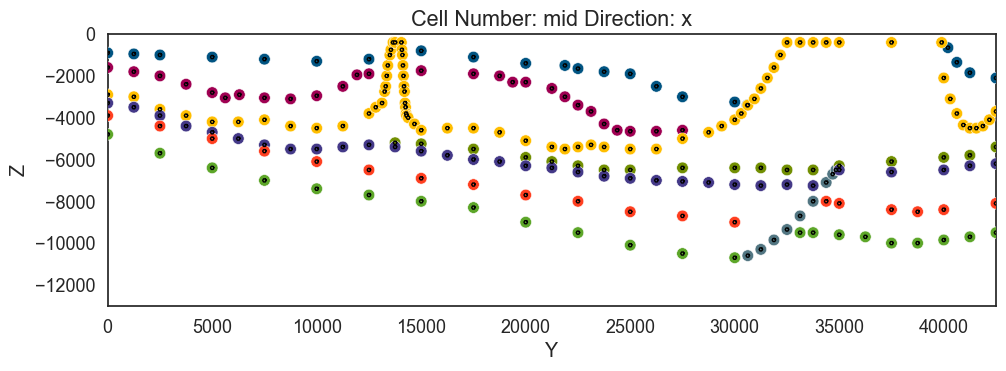

In [22]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [23]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [17]:
%%time
# Calculate orientation points
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 2)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

CPU times: total: 6.55 s
Wall time: 6.72 s


In [18]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [24]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                        values
range                44623.42
$C_o$             47410714.29
drift equations  [3, 3, 3, 3]
CPU times: total: 18.1 s
Wall time: 22.3 s


In [25]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

CPU times: total: 1min 13s
Wall time: 14.3 s


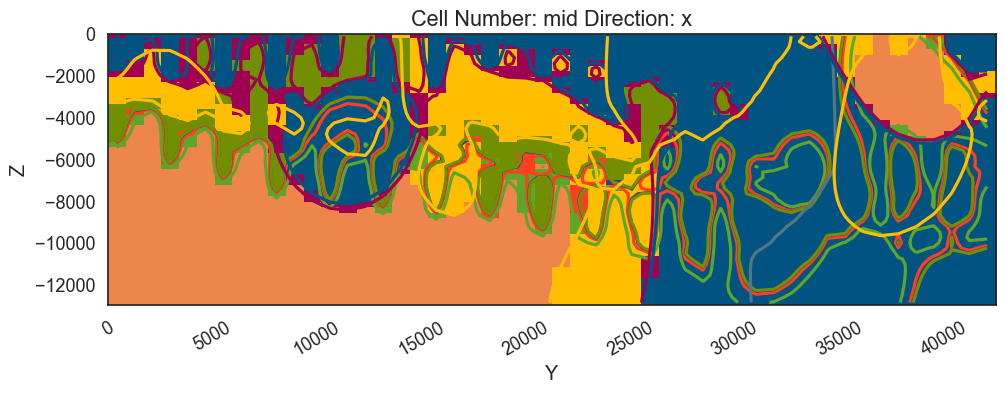

In [26]:
# Plot 2D of Y and X
#gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)

In [27]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False, show_results=True, show_lith=True, show_boundaries=True)

In [ ]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

#gp.save_model(geo_model, compress=True)